In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
import sklearn

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [4]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

display(num.head())
display(cat.head())

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [5]:
df['Income Category'] = df['Income_Category'].str.extract(r'(\d+)') # .......... extract all numericals from the column and save it to a new column
df['Income Category'] = df['Income Category'].astype(float) # .................. Turn the new column to a numerical datatype

In [6]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

display(num.head())
display(cat.head())

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40.0
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [7]:
df.drop(['CLIENTNUM', 'Income_Category'] , axis = 1, inplace = True)

In [8]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category
0,Existing Customer,45,M,3,High School,Married,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0
1,Existing Customer,49,F,5,Graduate,Single,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0
2,Existing Customer,51,M,3,Graduate,Married,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0
3,Existing Customer,40,F,4,High School,Unknown,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40.0
4,Existing Customer,40,M,3,Uneducated,Married,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0


CLEAN DATA

In [9]:
df.Marital_Status.value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [10]:
# Remove 'Unknown' Marital Status
df = df.loc[df['Marital_Status'] != 'Unknown']

In [11]:
df.Education_Level.value_counts()

Education_Level
Graduate         2901
High School      1859
Unknown          1405
Uneducated       1378
College           939
Post-Graduate     473
Doctorate         423
Name: count, dtype: int64

In [12]:
# Remove 'Unknown' from Education Level
df = df.loc[df['Education_Level'] != 'Unknown']


EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'Distribution Of credit limit')

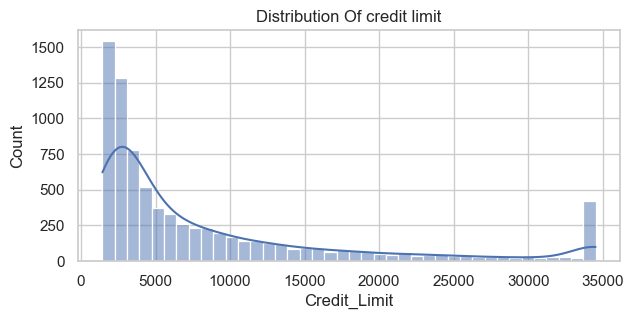

In [13]:
sns.set(style = 'whitegrid') 
plt.figure(figsize = (7, 3))  
sns.histplot(data=df, x='Credit_Limit', kde=True)
plt.title(f'Distribution Of credit limit')

Text(0.5, 1.0, 'Distribution Of Customer_Age')

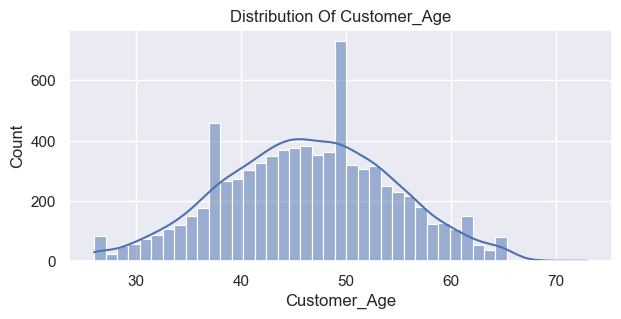

In [14]:
sns.set(style = 'darkgrid') 
plt.figure(figsize = (7, 3))  
sns.histplot(data=df, x='Customer_Age', kde = True)
plt.title(f'Distribution Of Customer_Age')

Text(0.5, 1.0, 'Distribution Of Total_Relationship_Count')

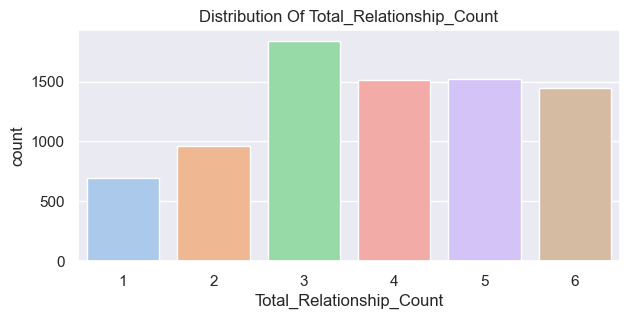

In [15]:
sns.set(style = 'darkgrid') 
plt.figure(figsize = (7, 3))  
sns.countplot(data=df, x='Total_Relationship_Count', palette = "pastel")
plt.title(f'Distribution Of Total_Relationship_Count')

BIVARIATE ANALYSIS

[Text(0, 0, '7347.7')]

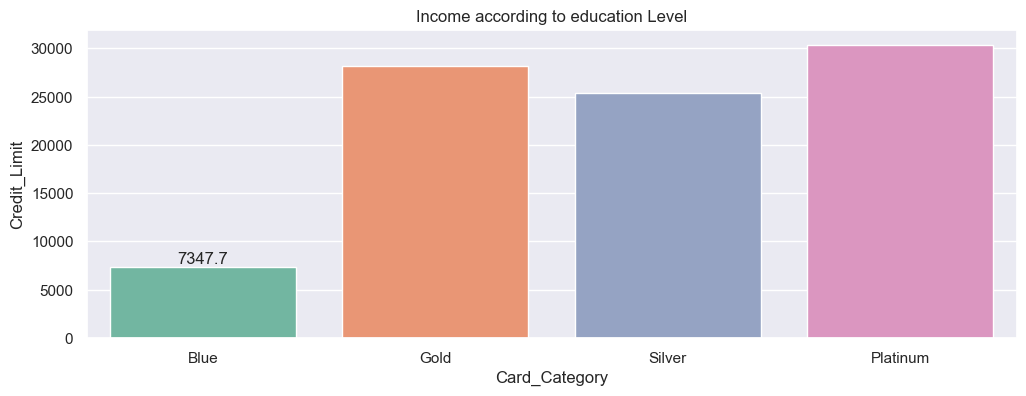

In [16]:
# USING CREDIT LIMIT AS A METRIC, SHOW THE HIERARCHY OF CUSTOMERS' IMPORTANCE BASED ON CARD CATEGORY
plt.figure(figsize = (12, 4))
sns.set(style = 'darkgrid')
plt.title ('Income according to education Level')
fig = sns.barplot(data = df, x = 'Card_Category', y = 'Credit_Limit',  ci = 0, estimator = 'mean', palette = 'Set2')
fig.bar_label(fig.containers[0], fmt = '%.1f')

<Axes: title={'center': 'Distribution of education Level according to Card Category'}, xlabel='Education_Level', ylabel='count'>

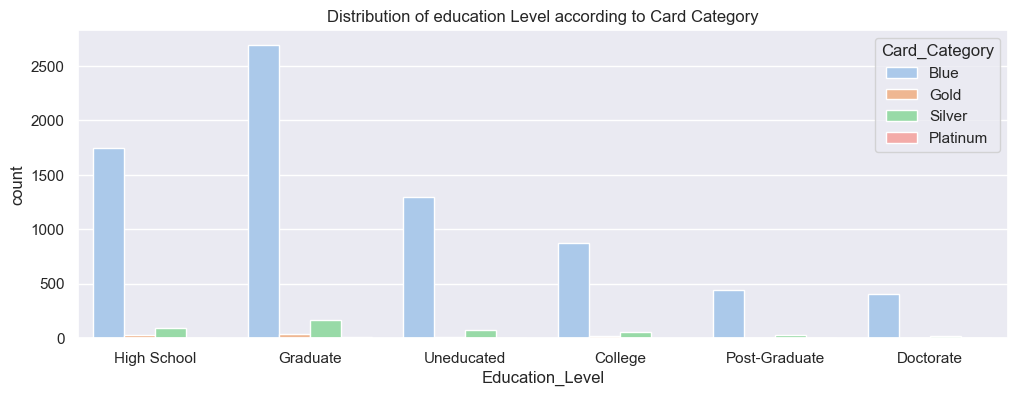

In [17]:
# SHOW THE DISTRIBUTION OF EDUCATION LEVEL ACCORDING TO CARD CATEGORY
plt.figure(figsize = (12, 4))
sns.set(style = 'darkgrid')
plt.title ('Distribution of education Level according to Card Category')
sns.countplot(data = df, x = 'Education_Level', hue = 'Card_Category',palette = "pastel" )

In [18]:
# DISTRIBUTION OF TOTAL TRANSACTION AMOUNT BY GENDER
px.pie(data_frame=df, names= 'Gender', values='Total_Trans_Amt',hole = 0.4, height = 400,title = 'Total transaction by gender')

MULTIVARIATE ANALYSIS

<Axes: title={'center': 'Category usage of card with attrition flag'}, xlabel='Card_Category', ylabel='Customer_Age'>

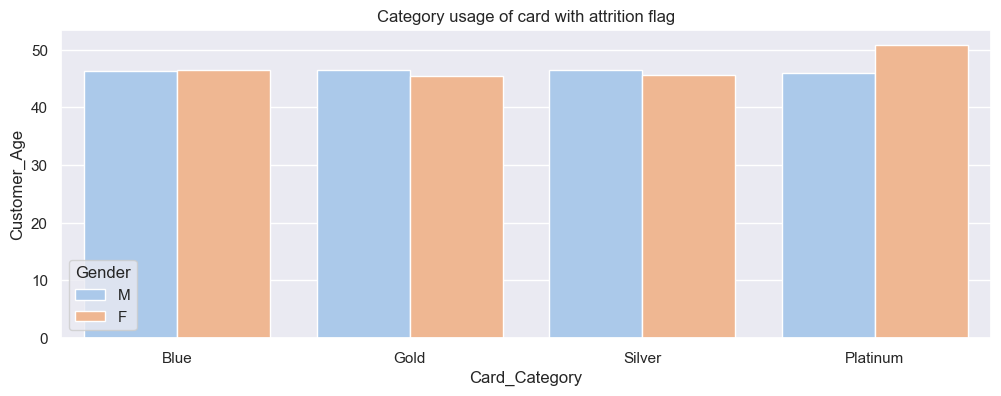

In [19]:
# VISUAISE THE AVERAGE AGE OF EACH VARYING CLASS CATEGORY WHILE SHOWING THEIR GENDER DISTRIBUTION
plt.figure(figsize = (12, 4))
sns.set(style = 'darkgrid')
plt.title ('Category usage of card with attrition flag')
sns.barplot(data = df, x = 'Card_Category', y = 'Customer_Age', hue = 'Gender',palette = "pastel",ci = 0, estimator = 'mean')

<Axes: >

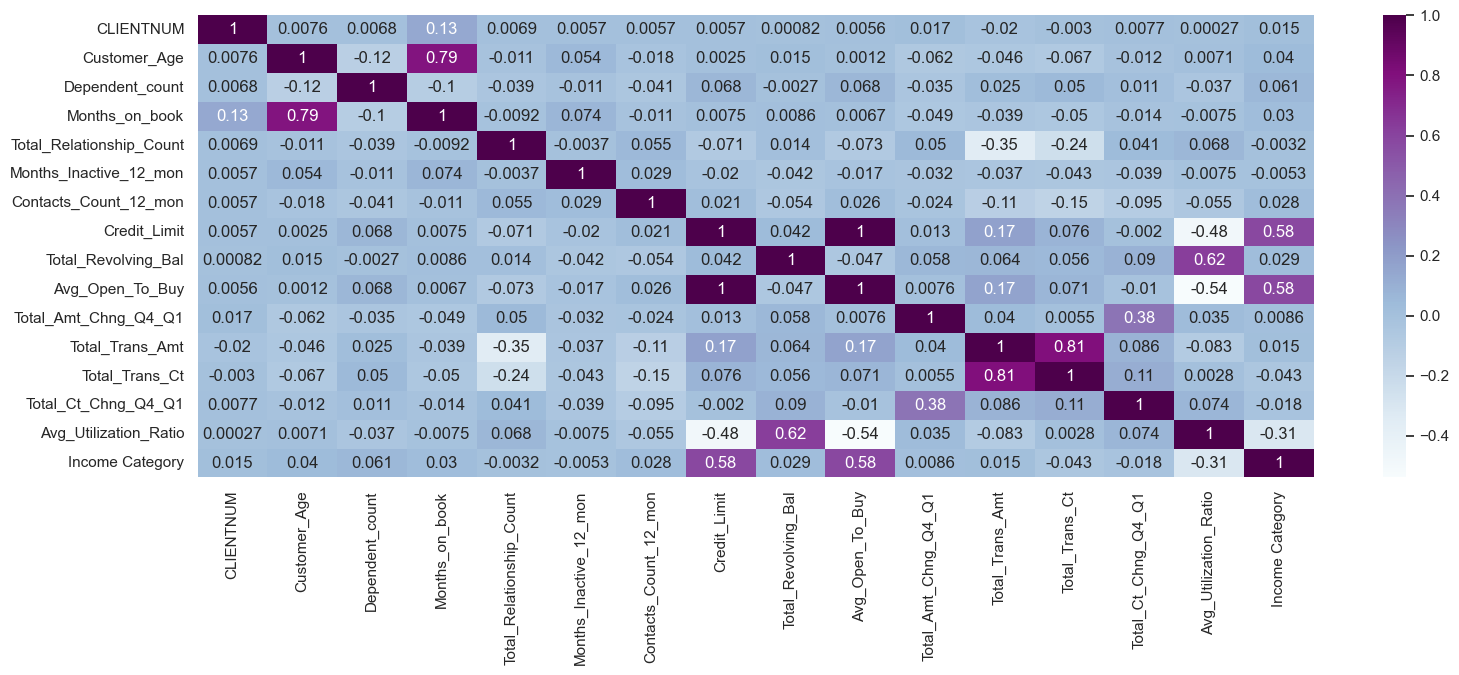

In [20]:
# Using a correlation matrix, visualize the relationship of all numerical values
plt.figure(figsize = (18, 6))
sns.heatmap(num.corr(), annot = True, cmap ='BuPu')

<Axes: title={'center': 'Credit limit of each Gender in relation to their educational level'}, xlabel='Education_Level', ylabel='Credit_Limit'>

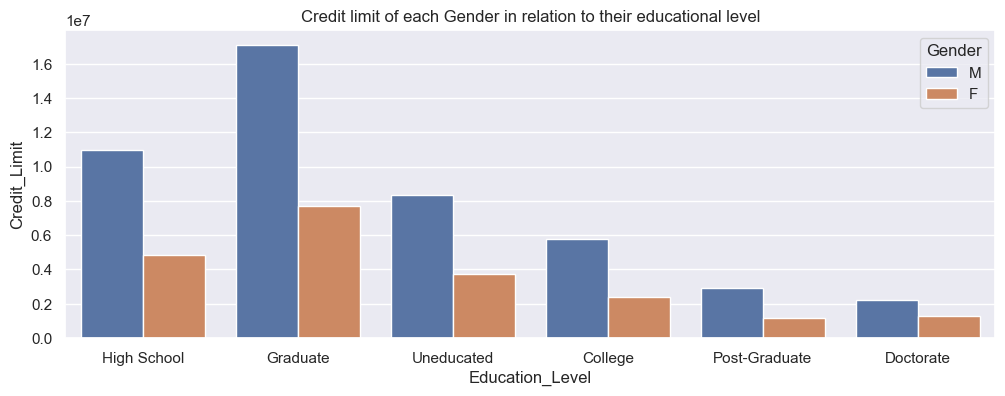

In [21]:
# WHAT EDUCATION LEVEL HAS THE HIGHEST CREDIT LIMIT
plt.figure(figsize = (12, 4))
sns.set(style = 'darkgrid')
plt.title ('Credit limit of each Gender in relation to their educational level')
sns.barplot(data = df, x = 'Education_Level', y = 'Credit_Limit', hue = 'Gender', ci = 0, estimator = 'sum')

FEATURE ENGINEERING

In [22]:
birth = pd.Series([2024 - i for i in df ['Customer_Age']])
birth

0       1979
1       1975
2       1973
3       1984
4       1980
        ... 
7968    1970
7969    1968
7970    1974
7971    1980
7972    1981
Length: 7973, dtype: int64

In [23]:
birth_year = []

for i in df['Customer_Age']:
    birth_year.append(2024 - i)

# convert new_list(birth_year) to series
birth_year = pd.Series(birth_year)
df['Birth Year'] = birth_year

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category,Birth Year
0,Existing Customer,45,M,3,High School,Married,Blue,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0,1979.0
1,Existing Customer,49,F,5,Graduate,Single,Blue,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0,1975.0
2,Existing Customer,51,M,3,Graduate,Married,Blue,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0,1973.0
4,Existing Customer,40,M,3,Uneducated,Married,Blue,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0,1980.0
5,Existing Customer,44,M,2,Graduate,Married,Blue,36,3,1,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,40.0,1987.0


DATA PREPROCESSING AND TRANSFORMATION

In [24]:
# LABEL ENCODING

encoders = {}
df = df.copy()
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() # ---------------------------------------------------------- Instantiate encoding library
for i in df.columns: # ------------------------------------------------------ iterate through the columns and find all categoricals
    if df[i].dtypes == 'O': # ----------------------------------------------- select all categoricals
        df[i] = lb.fit_transform(df[i]) # -------------------------------- Transform the selected df.
        encoders[i + '_encoded'] = lb
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category,Birth Year
0,1,45,1,3,3,1,0,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0,1979.0
1,1,49,0,5,2,2,0,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0,1975.0
2,1,51,1,3,2,1,0,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0,1973.0
4,1,40,1,3,5,1,0,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0,1980.0
5,1,44,1,2,2,1,0,36,3,1,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,40.0,1987.0


FEATURE SELECTION

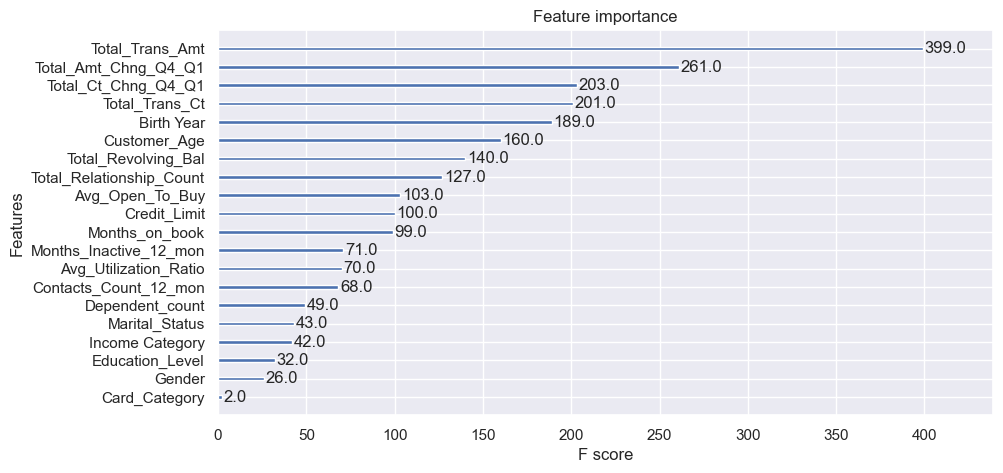

In [25]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = df.drop('Attrition_Flag', axis = 1)
y = df.Attrition_Flag

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [26]:
sel_columns = ['Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct',
 'Total_Revolving_Bal', 'Customer_Age', 'Credit_Limit', 'Total_Relationship_Count','Attrition_Flag']

sel_data = df[sel_columns]
sel_data

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Total_Revolving_Bal,Customer_Age,Credit_Limit,Total_Relationship_Count,Attrition_Flag
0,1144,1.335,1.625,42,777,45,12691.0,5,1
1,1291,1.541,3.714,33,864,49,8256.0,6,1
2,1887,2.594,2.333,20,0,51,3418.0,4,1
4,816,2.175,2.500,28,0,40,4716.0,5,1
5,1088,1.376,0.846,24,1247,44,4010.0,3,1
...,...,...,...,...,...,...,...,...,...
10120,15577,0.660,0.754,114,2109,54,13940.0,5,1
10121,14596,0.570,0.791,120,606,56,3688.0,4,1
10122,15476,0.703,0.857,117,1851,50,4003.0,3,1
10124,10291,0.819,0.818,60,0,44,5409.0,5,0


MODEL SELECTION

<Axes: xlabel='Attrition_Flag', ylabel='count'>

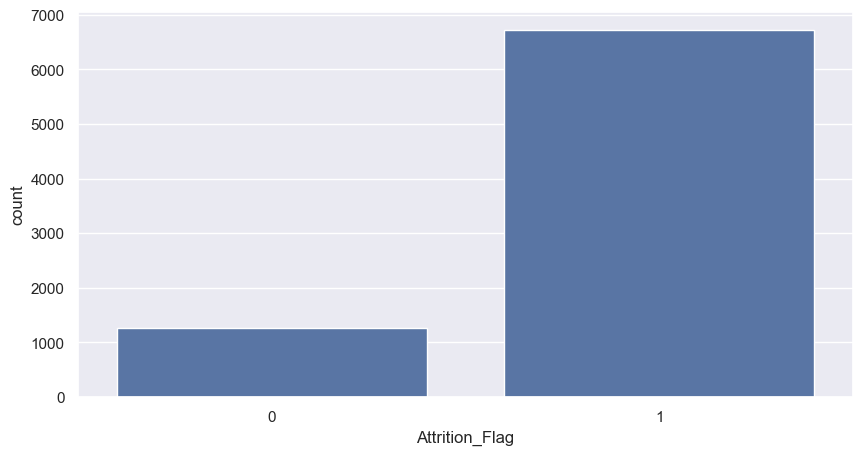

In [27]:
sns.countplot(x = df.Attrition_Flag)

In [28]:
x = sel_data.drop('Attrition_Flag', axis = 1)
y = sel_data.Attrition_Flag

# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

In [29]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset

smote = SMOTE(sampling_strategy='auto', random_state= 29) #  AUTO IT DECIDES ITSELF 
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

<Axes: xlabel='Attrition_Flag', ylabel='count'>

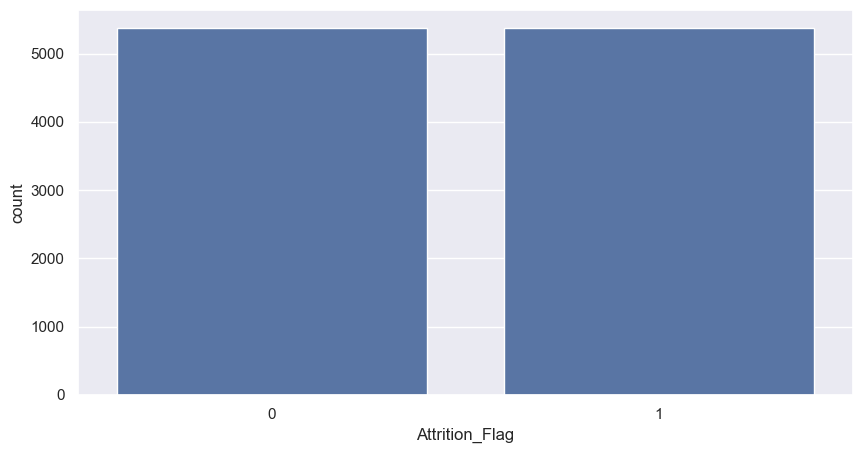

In [30]:
new_balanced_data_smote = pd.concat([X_resampled, y_resampled], axis = 1)
sns.countplot(x =new_balanced_data_smote['Attrition_Flag'] )

In [31]:
#print(f'Best Random State To Use: {np.array(scores).argmax()}')

In [32]:
def modeller(x_train, y_train, x_test, y_test, show_train_score = None):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # list of algorithms to be used
    algorithms = [RandomForestClassifier(), XGBClassifier(), DecisionTreeClassifier(), SVC(kernel = 'poly'), LogisticRegression()]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(x_train, y_train)
        model_validate = model_name.predict(x_train)
        train_validator.append(accuracy_score(model_validate, y_train))

        test_perf = model_name.predict(x_test)
        scores.append(accuracy_score(test_perf, y_test))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]

table, model1, model2 = modeller(X_resampled, y_resampled, xtest, ytest, show_train_score = 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.964263,1.000000
1,"XGBClassifier(base_score=None, booster=None, c...",0.963636,0.999907
2,DecisionTreeClassifier(),0.934796,1.000000
4,LogisticRegression(),0.788715,0.788905
3,SVC(kernel='poly'),0.423824,0.628537


MODEL EVALUATION

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5372
           1       1.00      1.00      1.00      5372

    accuracy                           1.00     10744
   macro avg       1.00      1.00      1.00     10744
weighted avg       1.00      1.00      1.00     10744



<Axes: >

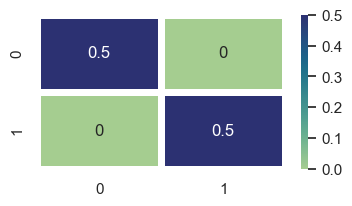

In [34]:
#--------- RandomForest CLASSIFIER MODELLING --------------
from sklearn.ensemble import RandomForestClassifier

Ran_model = RandomForestClassifier()

Ran_model.fit(X_resampled, y_resampled)

cross_validation = Ran_model.predict(X_resampled) # check for underfitting train sample(xtrain)
print(classification_report(cross_validation, y_resampled))

revealer = confusion_matrix(cross_validation, y_resampled)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       267
           1       0.97      0.99      0.98      1328

    accuracy                           0.97      1595
   macro avg       0.95      0.93      0.94      1595
weighted avg       0.97      0.97      0.97      1595



<Axes: >

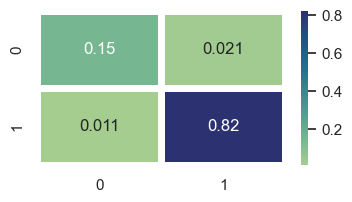

In [35]:
# Check For Overfitting

test_prediction = Ran_model.predict(xtest) # check for overfitting test sample(xtest)
print(classification_report(test_prediction, ytest)) 

revealer = confusion_matrix(test_prediction, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5) # True Positive and True Negative must always be equal to Accuracy Score

In [36]:
# serialise transformers and model
import joblib

joblib.dump(lb, 'encod.pkl') 
joblib.dump(Ran_model, 'Banks_model.pkl') # to save your model to a file

['Banks_model.pkl']

In [37]:
import joblib
imported_model = joblib.load('Banks_model.pkl')
imported_model

RandomForestClassifier()

In [38]:
# new customers data to predict the attrition of customers
new_customers = df.sample(7).drop('Attrition_Flag', axis = 1)
new_customers

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category,Birth Year
7378,32,0,2,5,2,0,25,3,2,1,3193.0,1533,1660.0,0.936,4419,75,0.786,0.480,NaN,1992.0
1050,51,1,1,5,1,0,41,5,3,3,5638.0,808,4830.0,0.781,2036,50,0.613,0.143,80.0,1991.0
8091,49,0,3,5,2,0,38,1,2,3,2655.0,2283,372.0,0.751,2386,49,0.485,0.860,40.0,NaN
3757,44,1,3,5,0,0,13,4,2,3,17846.0,1568,16278.0,1.064,3626,77,0.878,0.088,80.0,1976.0
9852,55,1,1,2,2,0,46,3,1,1,21032.0,1409,19623.0,0.767,15584,105,0.810,0.067,80.0,NaN
8527,45,0,2,5,2,0,36,2,2,2,1839.0,0,1839.0,0.782,4930,91,0.784,0.000,40.0,NaN
4521,51,1,2,3,1,0,46,5,3,2,4123.0,1760,2363.0,0.869,2447,40,0.429,0.427,60.0,1980.0


In [39]:
new_customers = new_customers[sel_columns[:-1]]
new_customers.dropna(inplace = True)
new_customers

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Total_Revolving_Bal,Customer_Age,Credit_Limit,Total_Relationship_Count
7378,4419,0.936,0.786,75,1533,32,3193.0,3
1050,2036,0.781,0.613,50,808,51,5638.0,5
8091,2386,0.751,0.485,49,2283,49,2655.0,1
3757,3626,1.064,0.878,77,1568,44,17846.0,4
9852,15584,0.767,0.810,105,1409,55,21032.0,3
8527,4930,0.782,0.784,91,0,45,1839.0,2
4521,2447,0.869,0.429,40,1760,51,4123.0,5


In [40]:
imported_model.predict(new_customers)

array([1, 1, 0, 1, 1, 1, 0])

In [41]:
# batch predict for the company, and save the predicted customer into a new column called predicted customer
new_customers['predicted_customers'] = imported_model.predict(new_customers)
new_customers

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Total_Revolving_Bal,Customer_Age,Credit_Limit,Total_Relationship_Count,predicted_customers
7378,4419,0.936,0.786,75,1533,32,3193.0,3,1
1050,2036,0.781,0.613,50,808,51,5638.0,5,1
8091,2386,0.751,0.485,49,2283,49,2655.0,1,0
3757,3626,1.064,0.878,77,1568,44,17846.0,4,1
9852,15584,0.767,0.810,105,1409,55,21032.0,3,1
8527,4930,0.782,0.784,91,0,45,1839.0,2,1
4521,2447,0.869,0.429,40,1760,51,4123.0,5,0
